In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d2/92/c2b9464a0562feb6ae780bdc152364810862e07ef5e6affa2b7686028db2/matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/0c/89/9830ba00d88e43d15e53d64931e66b8792b46eb25e2050a88fec4a0df3d5/contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/b9/0a/a57caaff3bc880779317cb157e5b49dc47fad54effe027016abd355b0651/fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     -------------- ------------------------ 61.4/167.0 kB 1.7 MB/s 

In [8]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 550.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 525.1 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                            OLS Regression Results                            
Dep. Variable:                    SYN   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     190.6
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          8.02e-257
Time:                        17:06:47   Log-Likelihood:                -6191.5
No. Observations:                4127   AIC:                         1.243e+04
Df Residuals:                    4103   BIC:                         1.258e+04
Df Model:                          23                                         
Covariance Type:              cluster                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

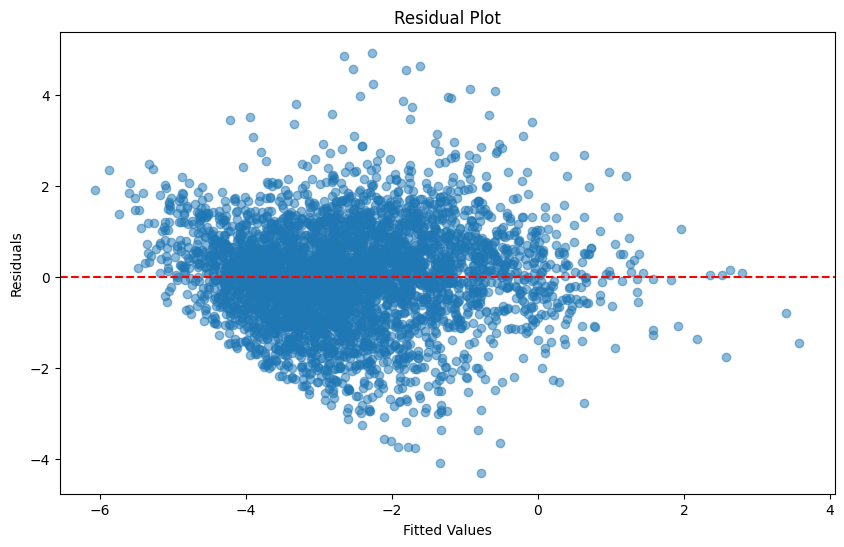

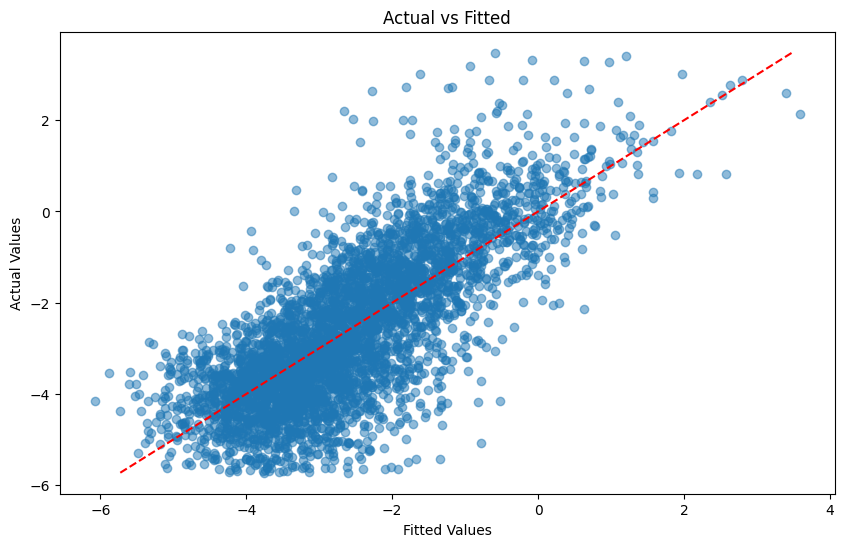

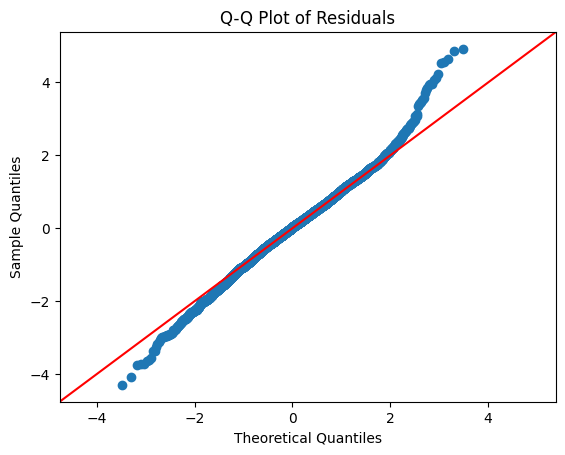

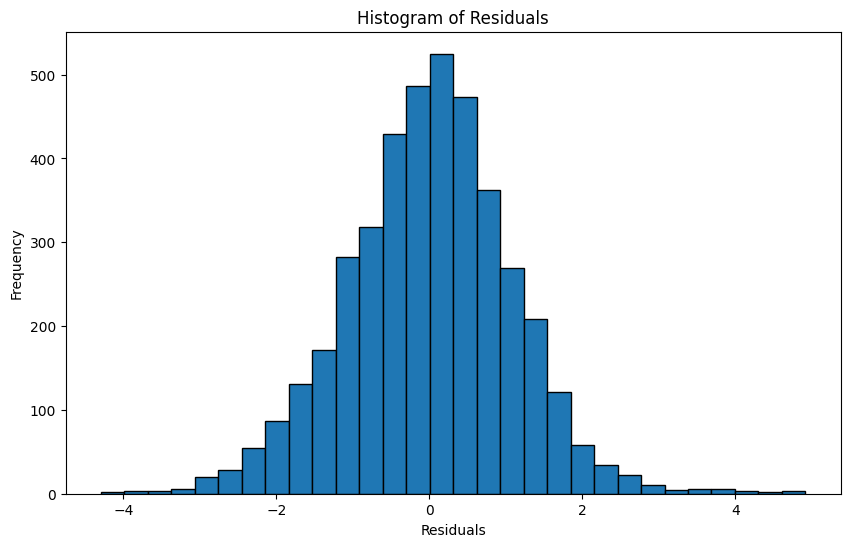

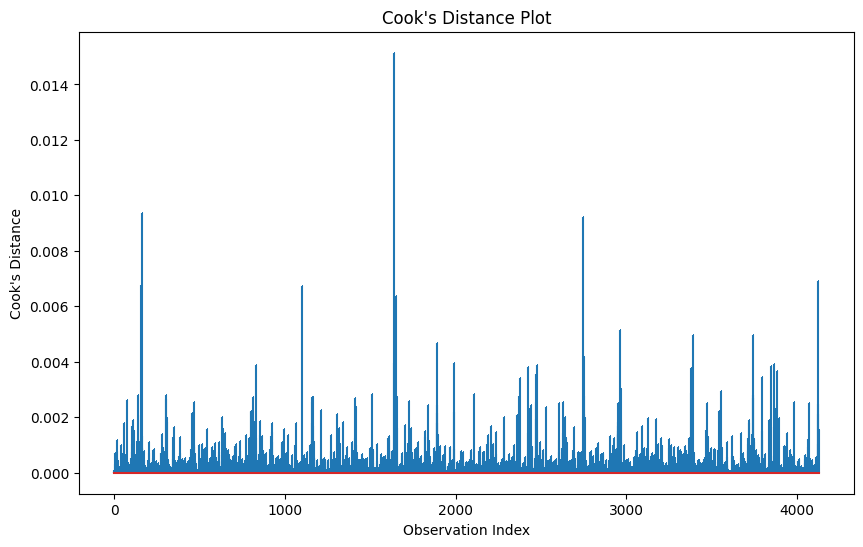

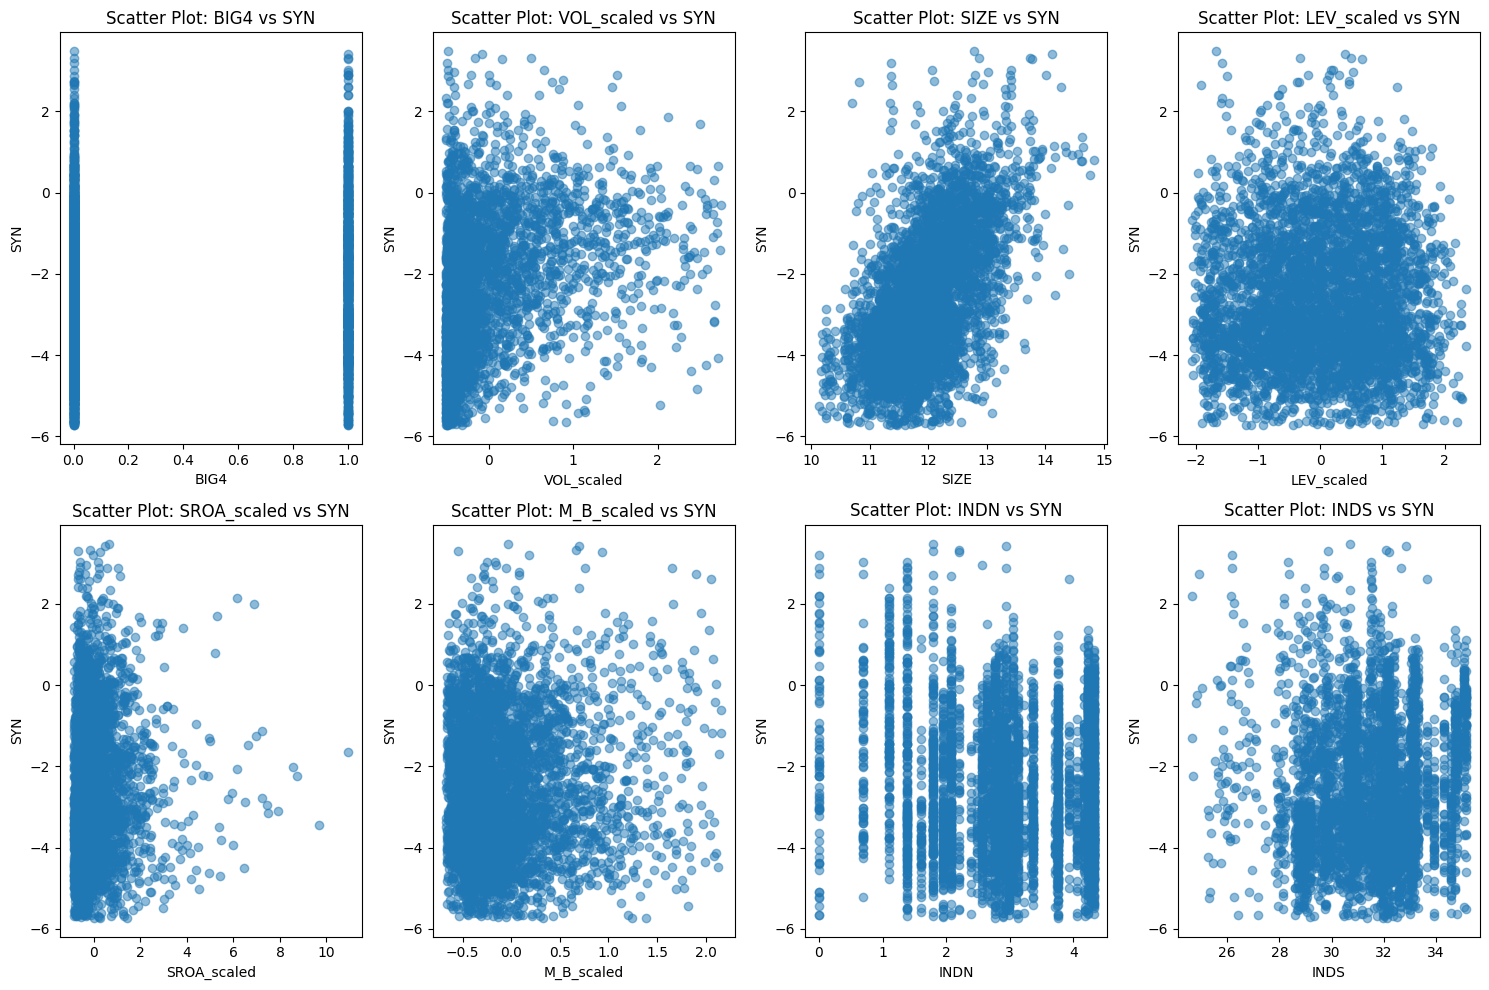

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
file_path = 'D:/data/file__data.csv'  # Thay bằng đường dẫn thực tế
data = pd.read_csv(file_path)

# Chuẩn hóa các biến
scaler = StandardScaler()
data[['VOL_scaled', 'M_B_scaled', 'INDN_scaled', 'INDS_scaled', 'SIZE_scaled', 'LEV_scaled', 
      'SROA_scaled']] = scaler.fit_transform(data[['VOL', 'M/B', 'INDN', 'INDS', 'SIZE', 'LEV', 'SROA']])

# Trimming thủ công cho biến VOL, M/B, và SYNCH
# Xác định ngưỡng phân vị 1% và 99% cho mỗi biến
trim_variables = ['VOL', 'M/B', 'SYN']
for var in trim_variables:
    lower_bound = data[var].quantile(0.02)
    upper_bound = data[var].quantile(0.98)
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]

# Tạo một biến độ trễ của SYNCH
data['SYN_lag1'] = data['SYN'].shift(1)

# Loại bỏ các hàng có giá trị thiếu do tạo biến độ trễ
data = data.dropna(subset=['SYN_lag1'])

# Lấy các biến giả năm và ngành đã có trong dữ liệu
year_dummies = data.filter(like='Year_')  # Tất cả các cột bắt đầu bằng "Year_"
industry_dummies = data.filter(like='Industry_')  # Tất cả các cột bắt đầu bằng "Industry_"

# Loại bỏ một số biến giả để giảm đa cộng tuyến
year_dummies_reduced = year_dummies[['Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 
                                     'Year_2021', 'Year_2022']]  # Loại bỏ một số biến giả năm
industry_dummies_reduced = industry_dummies[['Industry_Congnghethongtin', 'Industry_Daukhi', 'Industry_Dichvutieudung', 
                                             'Industry_Duocphamvayte', 'Industry_Hangtieudung', 'Industry_Nguyenvatlieu', 
                                             'Industry_Taichinh']]  # Loại bỏ một số biến giả ngành

# Chọn các biến độc lập bao gồm biến đã chuẩn hóa, các biến giả đã giảm, và biến độ trễ của SYNCH
X = pd.concat([data[['BIG4', 'VOL_scaled', 'SIZE_scaled', 'LEV_scaled', 'SROA_scaled', 'M_B_scaled', 'INDN_scaled', 
                     'INDS_scaled', 'SYN_lag1']], year_dummies_reduced, industry_dummies_reduced], axis=1)

# Biến phụ thuộc là SYNCH
y = data['SYN']

# Xử lý NaN và Inf
X = X.replace([np.inf, -np.inf], np.nan).dropna()  # Loại bỏ các hàng có giá trị NaN hoặc Inf
y = y.loc[X.index]  # Đồng bộ y với các hàng còn lại trong X

# Thêm hằng số (constant) vào mô hình
X = sm.add_constant(X)

# Thực hiện hồi quy OLS với clustering theo nhóm công ty (giả sử cột 'ma' là mã công ty)
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': data.loc[X.index, 'ma']})

# Hiển thị kết quả hồi quy
print(model.summary())

# Bước 1: Biểu đồ phần dư
residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Bước 2: Biểu đồ phân tán giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, y, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--')
plt.title('Actual vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.show()

# Bước 3: Biểu đồ Q-Q plot
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Bước 4: Biểu đồ histogram của phần dư
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Bước 5: Biểu đồ Cook's Distance
influence = model.get_influence()
(c, p) = influence.cooks_distance

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's Distance Plot")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()

# Bước 6: Scatter Plot giữa các biến độc lập và biến phụ thuộc (SYNCH)
independent_vars = ['BIG4', 'VOL_scaled', 'SIZE', 'LEV_scaled', 'SROA_scaled', 'M_B_scaled', 'INDN', 'INDS']

plt.figure(figsize=(15, 10))
for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 4, i)
    plt.scatter(data[var], data['SYN'], alpha=0.5)
    plt.title(f'Scatter Plot: {var} vs SYN')
    plt.xlabel(var)
    plt.ylabel('SYN')

plt.tight_layout()
plt.show()


In [26]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Trích xuất phần dư (residuals) từ mô hình OLS
residuals = model.resid

# Thực hiện Breusch-Pagan Test
bp_test = het_breuschpagan(residuals, X)

# Kết quả BP Test
bp_test_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_test_results = dict(zip(bp_test_labels, bp_test))

# Hiển thị kết quả
print("Kết quả Breusch-Pagan Test:")
for label, result in bp_test_results.items():
    print(f"{label}: {result}")


Kết quả Breusch-Pagan Test:
Lagrange multiplier statistic: 181.49298021136775
p-value: 1.3295441588974713e-26
f-value: 8.205984505285338
f p-value: 2.8134627577109313e-27


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Tính VIF cho các biến độc lập (trừ cột hằng số)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Hiển thị kết quả VIF
print(vif_data)

                     Variable        VIF
0                       const  23.204071
1                        BIG4   1.232318
2                  VOL_scaled   1.292269
3                 SIZE_scaled   2.195889
4                  LEV_scaled   1.307685
5                 SROA_scaled   1.143450
6                  M_B_scaled   1.168149
7                 INDN_scaled   5.049636
8                 INDS_scaled   6.513801
9                    SYN_lag1   1.507751
10                  Year_2016   1.729848
11                  Year_2017   1.755918
12                  Year_2018   1.740881
13                  Year_2019   1.772858
14                  Year_2020   1.794194
15                  Year_2021   1.734205
16                  Year_2022   1.753774
17  Industry_Congnghethongtin   1.307618
18            Industry_Daukhi   1.210713
19    Industry_Dichvutieudung   2.211796
20     Industry_Duocphamvayte   1.435526
21      Industry_Hangtieudung   2.326751
22     Industry_Nguyenvatlieu   3.751720
23          Indu

C:\Users\minhthao372003\AppData\Roaming\Python\Python312\site-packages\linearmodels\panel\model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:                    SYN   R-squared:                        0.0936
Estimator:                   PanelOLS   R-squared (Between):              0.1369
No. Observations:                4127   R-squared (Within):               0.1927
Date:                Sat, Nov 16 2024   R-squared (Overall):              0.1584
Time:                        22:58:14   Log-likelihood                   -5003.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      40.326
Entities:                         596   P-value                           0.0000
Avg Obs:                       6.9245   Distribution:                  F(9,3515)
Min Obs:                       1.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             21.060
                            

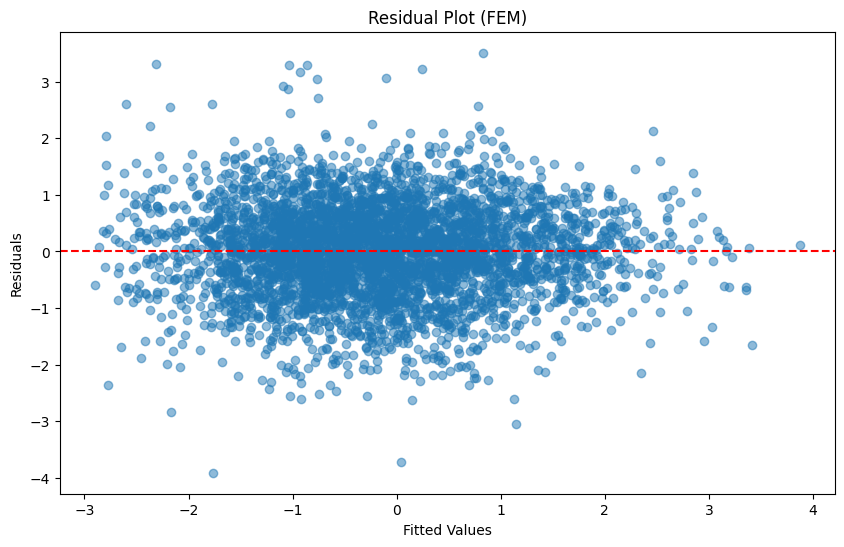

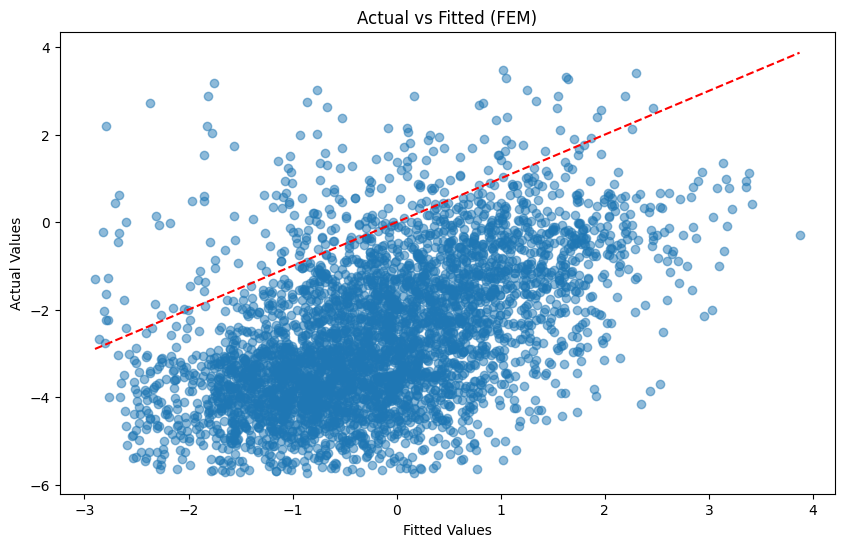

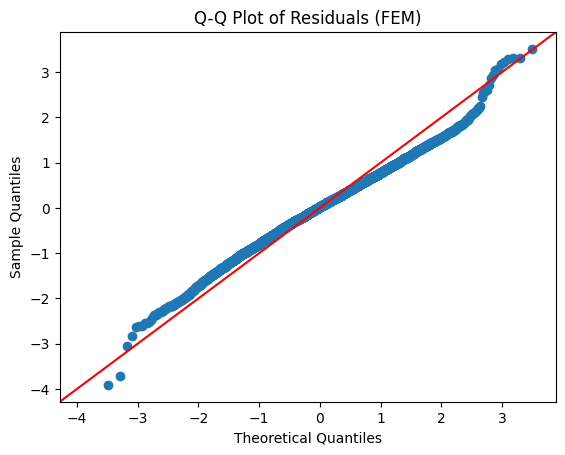

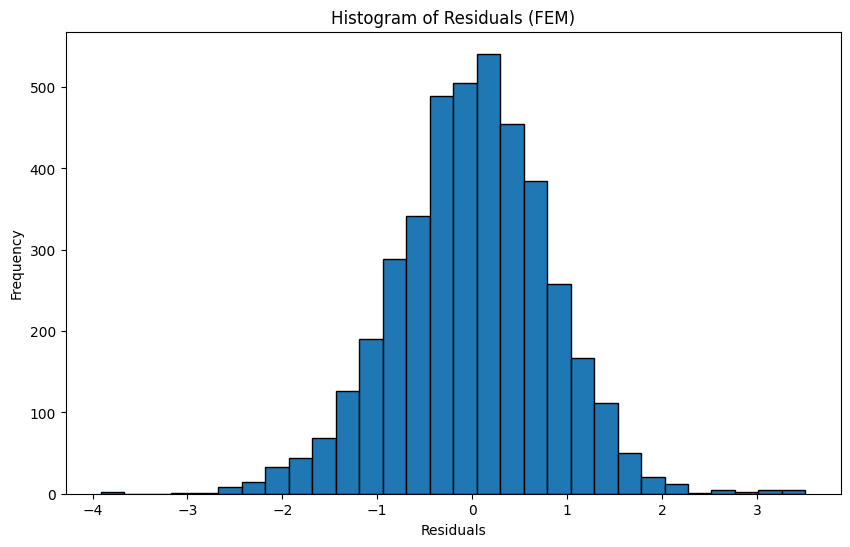

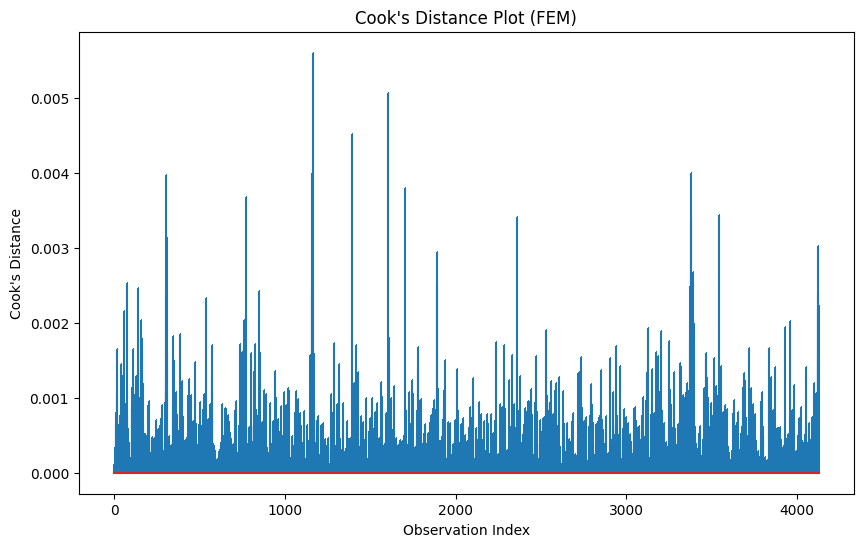

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
file_path = 'D:/data/file__data.csv'  # Thay bằng đường dẫn thực tế
data = pd.read_csv(file_path)

# Chuẩn hóa các biến (VOL, M/B, INDN, INDS)
scaler = StandardScaler()
data[['VOL_scaled', 'M_B_scaled', 'INDN_scaled', 'INDS_scaled', 'SIZE_scaled', 'LEV_scaled',
      'SROA_scaled']] = scaler.fit_transform(data[['VOL', 'M/B', 'INDN', 'INDS', 'SIZE', 'LEV', 'SROA']])

# Trimming thủ công cho biến VOL, M/B, và SYNCH
trim_variables = ['VOL', 'M/B', 'SYN']
for var in trim_variables:
    lower_bound = data[var].quantile(0.02)
    upper_bound = data[var].quantile(0.98)
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]

# Tạo một biến độ trễ của SYNCH
data['SYNCH_lag1'] = data['SYN'].shift(1)

# Loại bỏ các hàng có giá trị thiếu do tạo biến độ trễ
data = data.dropna(subset=['SYNCH_lag1'])

# Chuyển dữ liệu thành dạng panel
data = data.set_index(['ma', 'year'])  # 'ma' là mã công ty, 'year' là năm

# Xác định các biến độc lập và biến phụ thuộc
variables = ['BIG4', 'VOL_scaled', 'SIZE_scaled', 'LEV_scaled', 'SROA_scaled', 'M_B_scaled', 'INDN_scaled',
             'INDS_scaled', 'SYNCH_lag1']

# Thiết lập công thức hồi quy Fixed Effects Model
formula = 'SYN ~ ' + ' + '.join(variables) + ' + EntityEffects + TimeEffects'  # EntityEffects dùng cho yếu tố cố định theo công ty

# Thực hiện hồi quy Fixed Effects Model (FEM)
model = PanelOLS.from_formula(formula, data=data)
fem_results = model.fit(cov_type='clustered', cluster_entity=True)  # Sử dụng phương pháp clustering theo công ty

# Hiển thị kết quả hồi quy
print(fem_results.summary)

# Kiểm tra phần dư (Residuals)
residuals = fem_results.resids
fitted_values = fem_results.fitted_values
actual_values = data['SYN']  # Giá trị thực tế của biến phụ thuộc

# Đồng bộ chỉ số của actual_values với chỉ số của fitted_values
actual_values = actual_values.loc[fitted_values.index]

# Bước 1: Biểu đồ phần dư (Residual Plot)
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (FEM)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Bước 2: Biểu đồ phân tán giữa giá trị thực tế và giá trị dự đoán (Actual vs Fitted)
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, actual_values, alpha=0.5)
plt.plot(
    [fitted_values.min(), fitted_values.max()],
    [fitted_values.min(), fitted_values.max()],
    color='r',
    linestyle='--'
)
plt.title('Actual vs Fitted (FEM)')
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.show()

# Bước 3: Biểu đồ Q-Q plot (Q-Q Plot of Residuals)
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals (FEM)')
plt.show()

# Bước 4: Biểu đồ histogram của phần dư (Histogram of Residuals)
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals (FEM)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Bước 5: Biểu đồ Cook's Distance (Cook's Distance Plot)
# Tính toán Cook's Distance
influence = residuals**2 / (residuals.var() * len(residuals))
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(influence)), influence, markerfmt=",")
plt.title("Cook's Distance Plot (FEM)")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()


In [20]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Trích xuất phần dư và các biến độc lập
residuals = fem_results.resids
independent_vars = data[variables]

# Thêm hằng số vào các biến độc lập
independent_vars_with_const = sm.add_constant(independent_vars)

# Kiểm tra và xử lý dữ liệu
# Thay thế các giá trị inf và -inf bằng NaN
independent_vars_with_const.replace([np.inf, -np.inf], np.nan, inplace=True)

# Loại bỏ các hàng có chứa NaN
independent_vars_with_const = independent_vars_with_const.dropna()
residuals = residuals.loc[independent_vars_with_const.index]  # Đồng bộ chỉ số của residuals

# Kiểm tra lần cuối trước khi thực hiện BP Test
if independent_vars_with_const.isna().any().any():
    print("Vẫn còn giá trị NaN trong dữ liệu, vui lòng kiểm tra lại!")
else:
    print("Dữ liệu đã sẵn sàng cho BP Test.")

# Thực hiện Breusch-Pagan Test
bp_test = het_breuschpagan(residuals, independent_vars_with_const)

# Kết quả BP Test
bp_test_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_test_results = dict(zip(bp_test_labels, bp_test))

# Hiển thị kết quả
print("Kết quả Breusch-Pagan Test:")
for label, result in bp_test_results.items():
    print(f"{label}: {result}")


Dữ liệu đã sẵn sàng cho BP Test.
Kết quả Breusch-Pagan Test:
Lagrange multiplier statistic: 39.61638153957686
p-value: 8.915966400318944e-06
f-value: 4.4337148983087005
f p-value: 8.450790739936998e-06


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Tính VIF cho mỗi biến trong ma trận X (trừ cột hằng số)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

       Variable       VIF
0         const  4.181171
1          BIG4  1.163793
2    VOL_scaled  1.181139
3   SIZE_scaled  2.161034
4    LEV_scaled  1.277025
5  S_ROA_scaled  1.113287
6    M_B_scaled  1.072638
7   INDN_scaled  3.351067
8   INDS_scaled  3.833691
9    SYNCH_lag1  1.467323


C:\Users\minhthao372003\AppData\Roaming\Python\Python312\site-packages\linearmodels\panel\model.py:2759: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                        RandomEffects Estimation Summary                        
Dep. Variable:                    SYN   R-squared:                        0.3321
Estimator:              RandomEffects   R-squared (Between):              0.5934
No. Observations:                4406   R-squared (Within):               0.1560
Date:                Sat, Nov 16 2024   R-squared (Overall):              0.4753
Time:                        22:37:41   Log-likelihood                   -6694.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      242.88
Entities:                         604   P-value                           0.0000
Avg Obs:                       7.2947   Distribution:                  F(9,4396)
Min Obs:                       1.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             252.83
                            

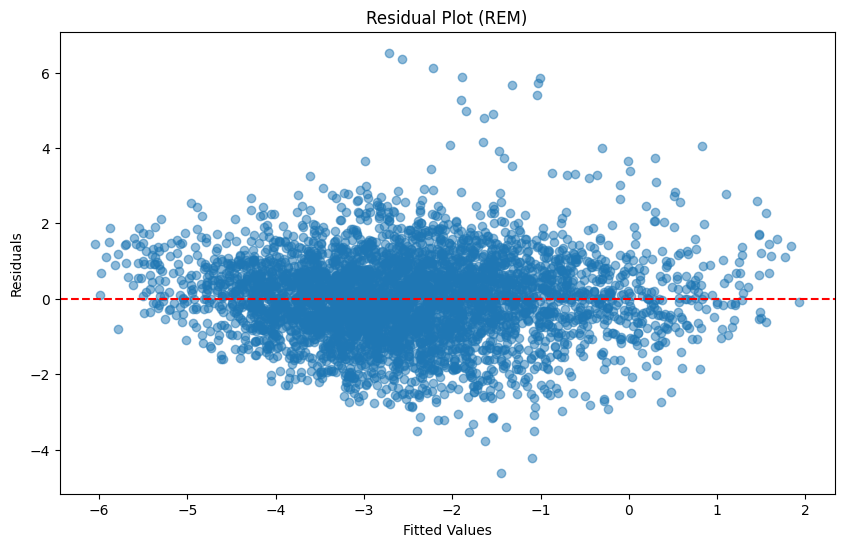

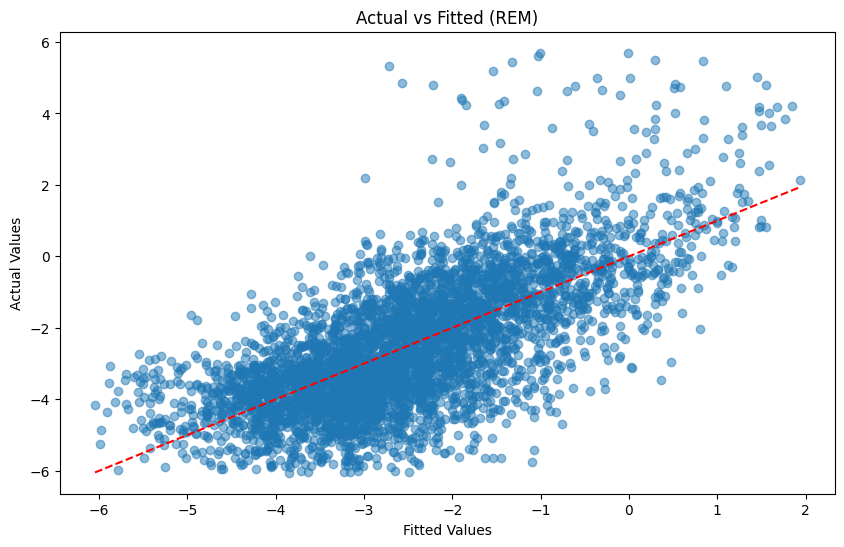

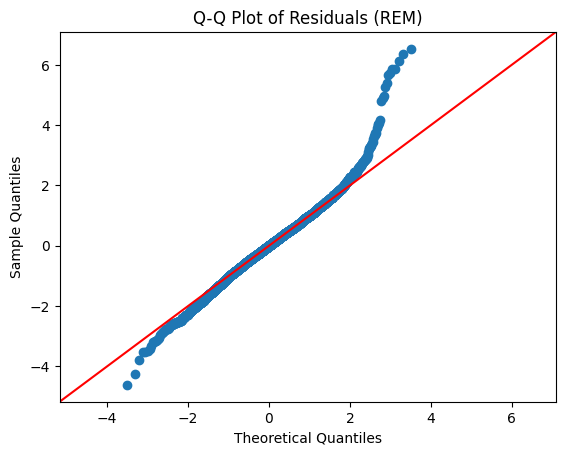

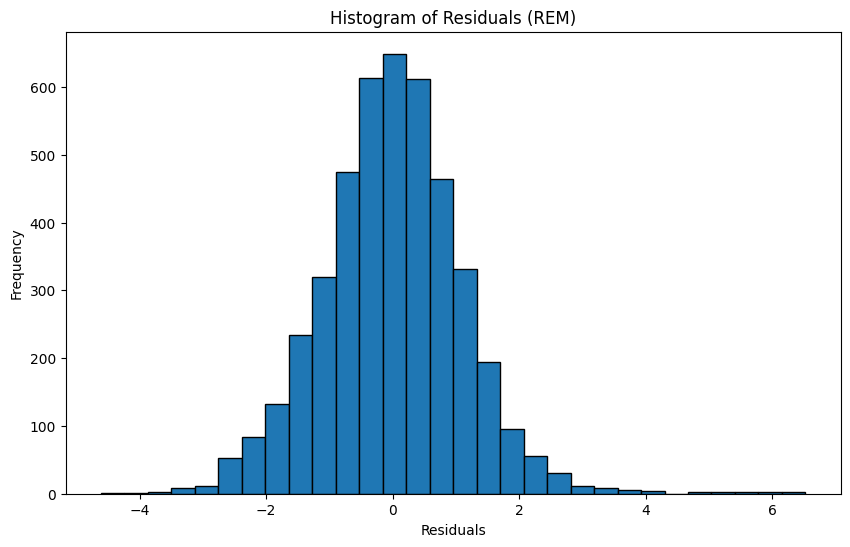

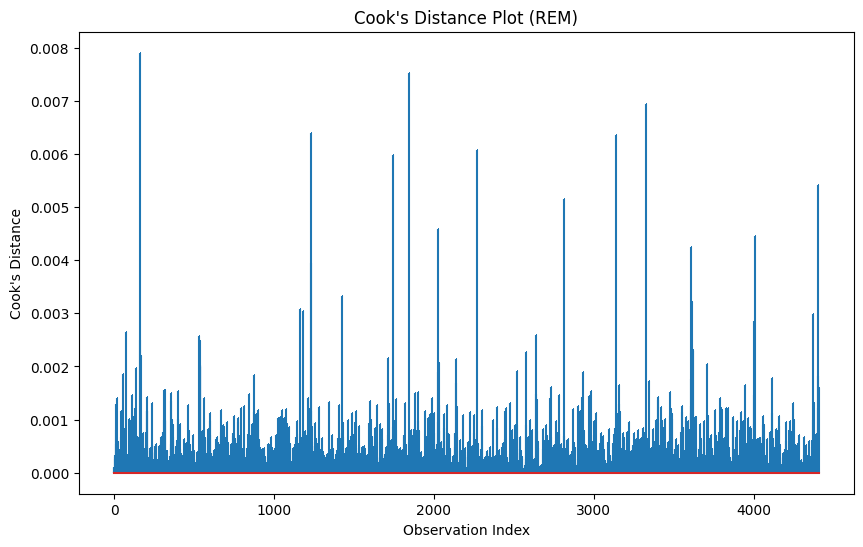

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from linearmodels.panel import RandomEffects

# Đọc dữ liệu từ file CSV
file_path = 'D:/data/file__data.csv'  # Thay bằng đường dẫn thực tế của bạn
data = pd.read_csv(file_path)

# Chuẩn hóa các biến (VOL, M/B, INDN, INDS)
scaler = StandardScaler()
data[['VOL_scaled', 'M_B_scaled', 'INDN_scaled', 'INDS_scaled', 'SIZE_scaled', 'LEV_scaled',
      'SROA_scaled']] = scaler.fit_transform(data[['VOL', 'M/B', 'INDN', 'INDS', 'SIZE', 'LEV', 'SROA']])

# Trimming thủ công cho biến VOL, M/B, và SYNCH
trim_variables = ['VOL', 'M/B', 'SYN']
for var in trim_variables:
    lower_bound = data[var].quantile(0.01)
    upper_bound = data[var].quantile(0.99)
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]

# Tạo một biến độ trễ của SYNCH
data['SYN_lag1'] = data['SYN'].shift(1)

# Loại bỏ các hàng có giá trị thiếu do tạo biến độ trễ
data = data.dropna(subset=['SYN_lag1'])

# Chuyển dữ liệu thành dạng panel
data = data.set_index(['ma', 'year'])  # 'ma' là mã công ty, 'year' là năm

# Xác định các biến độc lập và biến phụ thuộc
variables = ['BIG4', 'VOL_scaled', 'SIZE_scaled', 'LEV_scaled', 'SROA_scaled', 'M_B_scaled', 'INDN_scaled',
             'INDS_scaled', 'SYN_lag1']
y = data['SYN']
X = data[variables]

# Thêm hằng số (constant) vào mô hình
X = sm.add_constant(X)

# Thực hiện hồi quy Random Effects Model (REM)
model = RandomEffects(y, X)
rem_results = model.fit()

# Hiển thị kết quả hồi quy
print(rem_results.summary)

# Kiểm tra phần dư (Residuals)
residuals = rem_results.resids
fitted_values = rem_results.fitted_values
actual_values = y.loc[fitted_values.index]  # Đồng bộ chỉ số với fitted_values

# Bước 1: Biểu đồ phần dư (Residual Plot)
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (REM)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Bước 2: Biểu đồ phân tán giữa giá trị thực tế và giá trị dự đoán (Actual vs Fitted)
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, actual_values, alpha=0.5)
plt.plot(
    [fitted_values.min(), fitted_values.max()],
    [fitted_values.min(), fitted_values.max()],
    color='r',
    linestyle='--'
)
plt.title('Actual vs Fitted (REM)')
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.show()

# Bước 3: Biểu đồ Q-Q plot (Q-Q Plot of Residuals)
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals (REM)')
plt.show()

# Bước 4: Biểu đồ histogram của phần dư (Histogram of Residuals)
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals (REM)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Bước 5: Biểu đồ Cook's Distance (Cook's Distance Plot)
# Tính toán Cook's Distance
influence = residuals**2 / (residuals.var() * len(residuals))
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(influence)), influence, markerfmt=",")
plt.title("Cook's Distance Plot (REM)")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()
